In [1]:
#!pip install install dowhy
#!pip install RISE

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from dowhy import CausalModel
import dowhy.datasets
from IPython.display import Image, display
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_effect_modifiers=1,
        num_samples=5000,
        treatment_is_binary=True,
        stddev_treatment_noise=10,
        num_discrete_common_causes=1)
df = data["df"]

In [4]:
for key in data:
    if key != 'df':
     print(key, "->", data[key])

treatment_name -> ['v0']
outcome_name -> y
common_causes_names -> ['W0', 'W1', 'W2', 'W3', 'W4']
instrument_names -> ['Z0', 'Z1']
effect_modifier_names -> ['X0']
frontdoor_variables_names -> []
dot_graph -> digraph {v0->y;W0-> v0; W1-> v0; W2-> v0; W3-> v0; W4-> v0;Z0-> v0; Z1-> v0;W0-> y; W1-> y; W2-> y; W3-> y; W4-> y;X0-> y;}
gml_graph -> graph[directed 1node[ id "y" label "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"] node[ id "W2" label "W2"] node[ id "W3" label "W3"] node[ id "W4" label "W4"]node[ id "Z0" label "Z0"] node[ id "Z1" label "Z1"]node[ id "v0" label "v0"]edge[source "v0" target "y"]edge[ source "W0" target "v0"] edge[ source "W1" target "v0"] edge[ source "W2" target "v0"] edge[ source "W3" target "v0"] edge[ source "W4" target "v0"]edge[ source "Z0" target "v0"] edge[ source "Z1" target "v0"]edge[ source "W0" target "y"] edge[ source "W1" target "y"] edge[ source "W2" target "y"] edge[ source "W3" target "y"] edge[ source "W4" target "y"]node[ id "X0" label 

In [5]:
# Without graph
model= CausalModel(
        data=df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        common_causes=data["common_causes_names"],
        effect_modifiers=data["effect_modifier_names"],
        instruments=data["instrument_names"])


In [6]:
model.summary()

"Model to find the causal effect of treatment ['v0'] on outcome ['y']"

In [7]:
print(model.get_common_causes())
print(model.get_effect_modifiers())
print(model.get_instruments())


['W1', 'W0', 'W3', 'W4', 'W2']
['X0']
['Z1', 'Z0']


In [8]:
df

,X0,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,-0.519530,0.0,0.680476,-0.282105,-0.362194,0.140558,1.668053,0,True,11.127637
1,2.133431,1.0,0.813440,0.028942,-1.163175,2.036444,-1.543393,2,True,13.112598
2,0.062473,1.0,0.638135,-1.095388,-0.028825,-0.600449,-1.542834,2,True,10.023014
3,0.087544,1.0,0.573439,0.639267,-0.519385,1.745542,-0.164489,0,True,11.669888
4,-0.501427,1.0,0.045879,-1.154260,1.476705,-0.552128,1.458037,0,False,6.008089
...,...,...,...,...,...,...,...,...,...,...
4995,2.085457,1.0,0.974260,-0.022156,0.251530,1.155301,0.590796,1,True,19.846164
4996,1.096449,1.0,0.610415,-2.200706,1.800359,-0.349106,1.308025,3,True,27.661943
4997,-0.686926,1.0,0.471778,-0.459015,-2.853532,0.161828,1.650699,3,True,11.160081
4998,2.112047,1.0,0.294303,-1.373357,-2.049375,-0.736836,0.721980,0,True,-3.692410


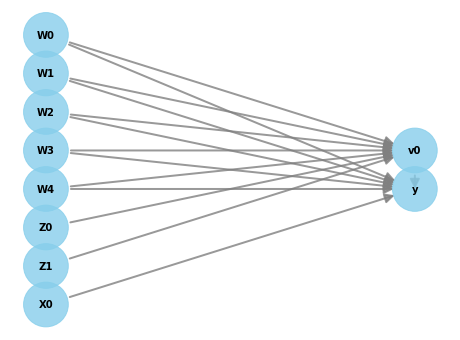

In [9]:
model.view_model()

In [10]:
identified_estimand=model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W1,W0,W3,W4,W2])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W1,W0,W3,W4,W2,U) = P(y|v0,W1,W0,W3,W4,W2)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                              -1⎤
 ⎢    d        ⎛    d          ⎞  ⎥
E⎢─────────(y)⋅⎜─────────([v₀])⎟  ⎥
 ⎣d[Z₁  Z₀]    ⎝d[Z₁  Z₀]      ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



## Good!
### So now, we have 2 estimands. Which one do we use?

- https://www.pywhy.org/dowhy/v0.11.1/example_notebooks/dowhy_simple_example.html

In [11]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print(causal_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W1,W0,W3,W4,W2])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W1,W0,W3,W4,W2,U) = P(y|v0,W1,W0,W3,W4,W2)

## Realized estimand
b: y~v0+W1+W0+W3+W4+W2+v0*X0
Target units: 

## Estimate
Mean value: 10.52910579582622
### Conditional Estimates
__categorical__X0
(-2.812, 0.0928]     9.736442
(0.0928, 0.677]     10.232093
(0.677, 1.182]      10.533106
(1.182, 1.736]      10.827441
(1.736, 4.488]      11.316447
dtype: float64


## From chatgpt

```
Realized Estimand:

This section provides details about how the causal effect identified above is realized or estimated.
b: y~v0+W0+W3+W4+W2+W1+v0*X0 - This line represents the regression formula used to estimate the causal effect. It indicates that the outcome variable y is regressed on v₀, W0, W3, W4, W2, W1, and an interaction term between v₀ and X0.
Target units: Not specified in this output.
Estimate:

Mean value: 12.456208795951651 - This is the estimated average treatment effect (ATE). It suggests that, on average, the expected change in y due to a one-unit change in v₀ is approximately 12.456.
Conditional Estimates: This section provides estimates of the causal effect for different levels of the variable X0.
For each category of X0, it provides the estimated causal effect of v₀ on y. For example, for the category (-3.291, -0.336] of X0, the estimated causal effect is 5.597391.
```


### Check this
Realized estimand
b: y~v0+W0+W1+W3+W4+W2+v0*X0
Target units: 

Wherefrom does the interaction term v0*X0 appear!


In [12]:
reg_model=smf.ols(formula='y~v0+W0+W1+W3+W4+W2+v0*X0', data=df)
ols_op = reg_model.fit()

print(ols_op.params['v0[T.True]'])
print("#####################")
print("Regression Coeff: \n", ols_op.params)
print("#####################")

print("p Value: ", ols_op.pvalues.loc['v0[T.True]'])
print("95% Confidence Interval: ", ols_op.conf_int(alpha = 0.05).loc['v0[T.True]'].values)

10.000757375873693
#####################
Regression Coeff: 
 Intercept        -0.000234
v0[T.True]       10.000757
W4[T.1]           4.516857
W4[T.2]           9.033266
W4[T.3]          13.550330
W0                3.889232
W1                5.100216
W3                2.511584
W2                1.254337
X0                0.000333
v0[T.True]:X0     0.570766
dtype: float64
#####################
p Value:  0.0
95% Confidence Interval:  [ 9.99906977 10.00244499]


In [13]:
# or better still
# Since Identification shows a IV, Confounder/Backdoor - as can be seen from inspection of the DAG as well,
# we should also use another method to estimate the ATE.

# Let us try all the methods for estimating effect

for m in ["backdoor.propensity_score_matching",
            "backdoor.propensity_score_stratification",
            "backdoor.propensity_score_weighting",
            "backdoor.linear_regression",
            "backdoor.generalized_linear_model",
            "iv.instrumental_variable",
            "iv.regression_discontinuity",
            "frontdoor.two_stage_regression"
            ] :
    try:
        print("\n For method = ",m)
        causal_estimate = model.estimate_effect(identified_estimand,
                method_name=m)
        print(causal_estimate)
    except Exception as err:
        print(f"Unexpected {err=}, {type(err)=}")


 For method =  backdoor.propensity_score_matching
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W1,W0,W3,W4,W2])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W1,W0,W3,W4,W2,U) = P(y|v0,W1,W0,W3,W4,W2)

## Realized estimand
b: y~v0+W1+W0+W3+W4+W2
Target units: ate

## Estimate
Mean value: 11.395475789554071


 For method =  backdoor.propensity_score_stratification
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W1,W0,W3,W4,W2])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W1,W0,W3,W4,W2,U) = P(y|v0,W1,W0,W3,W4,W2)

## Realized estimand
b: y~v0+W1+W0+W3+W4+W2
Target units: ate

## Estimate
Mean